In [2]:
import pandas as pd
from better_profanity import profanity
import swifter
import regex as re
from tqdm.notebook import tqdm

tqdm.pandas()

In [2]:
pd.set_option('display.max_colwidth', 1)


In [3]:
reddit_file = 'Z://Year 2//Programming//DAC//External Project//csvs//comments//reddit.csv'
effective_forum_file = 'Z://Year 2//Programming//DAC//External Project//csvs//comments//effectivealtruism_antidepressants.csv'
cancer_forum_file = 'Z://Year 2//Programming//DAC//External Project//csvs//comments//cancer_research.csv'
anti_depressant_file = 'Z://Year 2//Programming//DAC//External Project//csvs//comments//symptoms_and_withdrawals.csv'



In [4]:
reddit_df = pd.read_csv(reddit_file)
effective_forum_df = pd.read_csv(effective_forum_file)
cancer_forum_df = pd.read_csv(cancer_forum_file)
anti_depressant_df = pd.read_csv(anti_depressant_file)

In [5]:
anti_depressant_df.head(3)

Date  \
0  October 9, 2012   
1  March 8, 2013     
2  March 8, 2013     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [6]:
anti_depressant_df['year'] = anti_depressant_df['Date'].str.extract(r'(\d+)$')
anti_depressant_df = anti_depressant_df.query('year >= "2018" & Comment.notnull()')
anti_depressant_df['type'] = 'anti-depressants'

In [7]:
anti_depressant_df.head(3)

,Date,Comment,year,type
78,"January 4, 2018","bob, quite often we find people are sensitized to ""normal"" dosages; our recommendations for reinstatement are usually tiny amounts to start, to see what happens.\n On 12/20/2017 at 8:46 AM, Downbutnotout said:\nSo you only updose if you’re side effects are from getting the medication out of your system? So how do I know my effects are from the medication bring out of my system or just bring depressed? I added 3 mg of Effexor back in but how do I know that’s really the problem? My effects are anxiety, horrible depression. But how do I know it’s from the effexir 6 weeks ago, the upping of trazadone or the short reinstatement if prozac which has made me insane?How will I know the reinstatement of Effexor beads is going anything??\nExpand \n DBNO, we've discussed this in your Intro topic. Please go back and re-read it.",2018,anti-depressants
79,"January 15, 2018",I had several responses to my signature. I am very concerned about my well being. I am not feeling well and from your response I tapered too quickly. I want to work with my Dr. and be sure that I am doing the right thing. I added the 20 mg Prozac because I have nothing else and need to hear back from Psychiatrist. I tried to summarize my sign. To make it clearer.,2018,anti-depressants
80,"March 10, 2018","Unfortunately ,too late reinstatement throw me into kindling.It's been 6 years now .stranded whenin I reinstated Prozac after 10 months off .I got adverse reactions since that 2012 ,till now even if I switched to lexapro in 2016 nothing helped.",2018,anti-depressants


In [8]:
merged_df = pd.concat([anti_depressant_df[['Comment','type' ]]\
                       .rename(columns={'Comment' : 'comments'}),
                        reddit_df, effective_forum_df , cancer_forum_df ] , 
                       ignore_index=True)

## Pre-Processing data

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [10]:
def lemmatize_words(text):
    """custom function to lemmatize the words"""
    return " ".join([lemmatizer.lemmatize(word) for word in text.split(' ')])

In [11]:
def pre_process(dataframe):

    
    #converts text to lowercase
    dataframe['comments'] = dataframe['comments'].apply(lambda x: x.lower())

    quesion_finidng_patterns =  r'do i|do you|what|who|is it|why|would you|how|is there|' \
                           r'are there|is it so|is this true|to know|is that true|are we|' \
                           r'am i|question is|tell me more|can i|can we|tell me|' \
                           r'can you explain|question|answer|questions|answers|ask|\?'
    


    dataframe['question'] = dataframe['comments'].str.extract(f'({quesion_finidng_patterns})', flags=re.IGNORECASE)

    #Remove usernames  of certain comments
    dataframe['comments'] = dataframe['comments'].str.replace(r"on.+\d+.+\w+\s*said\W", " ")

    #remove single alphabets
    dataframe['comments'] = dataframe['comments'].str.replace(r'[^a-z\s]', ' ')

    #Removes any other whitespace 
    dataframe['comments'] = dataframe['comments'].str.replace(r'\n|\t|\\w|\s', ' ')

    #remove numbers
    dataframe['comments'] = dataframe['comments'].str.replace(r"\d", " ")

    #remove Hyperlinks
    dataframe['comments'] = dataframe['comments'].str.replace(r"<.*?>+|https?://\S+|www\.\S+", " ")
    
    #Remove all punctionations
    dataframe['comments'] = dataframe['comments'].str.replace(r"[^\w\s]|_", " ")

    #Removing Emojis and any other image related symbols
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoji
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251" 
                           "]+", flags=re.UNICODE)
    
    dataframe['comments'] = dataframe['comments'].apply(lambda x: emoji_pattern.sub(r' ', x))

    #Lemmatize the words
    print('Lemmatizing Words')
    dataframe['comments'] = dataframe['comments'].swifter.apply(lemmatize_words) 

    print('Removing Profanity')
    dataframe['comments'] = dataframe['comments'].swifter.apply(profanity.censor)
    dataframe['comments'] = dataframe['comments'].str.replace(r'\*+', ' ')




In [12]:
pre_process(merged_df)

Lemmatizing Words


Pandas Apply:   0%|          | 0/19172 [00:00<?, ?it/s]

Removing Profanity


Pandas Apply:   0%|          | 0/19172 [00:00<?, ?it/s]

<Axes: ylabel='type'>

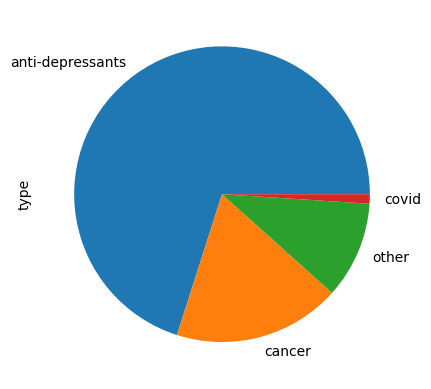

In [13]:
merged_df.type.value_counts().plot(kind='pie')

In [20]:
merged_df.to_csv('merged.csv',index=False)

In [3]:
merged_df = pd.read_csv('merged.csv')

In [4]:
comments_questions = merged_df.query('question.notnull()').reset_index(drop=True)

In [6]:
comments_questions.type.value_counts()

anti-depressants    9643
cancer              1477
other                847
covid                 99
Name: type, dtype: int64

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
def tfidf_comments(forum_types):
    for forum in forum_types:
        df = comments_questions.query('type == @forum ')
        
        tfidf = TfidfVectorizer()
        X= tfidf.fit_transform(df['comments'])
        y = tfidf.get_feature_names_out()

        filename = 'csvs//tfidf_'+ forum + '.csv'
        pd.DataFrame({'tfidf':y}).to_csv(filename , index=False)

In [7]:
tfidf_comments(['cancer','anti-depressants' , 'covid' ])